In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon/Pokemon.csv


In [6]:
df = pd.read_csv('../input/pokemon/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
df.describe()


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Column Type 2 has null lines, so I won't use this column

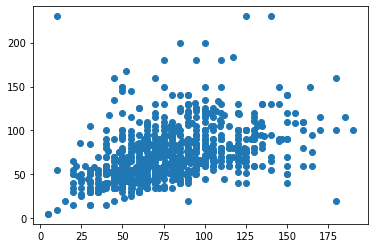

In [9]:
plt.scatter(df.Attack,df.Defense)


In [10]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Type 1', ylabel='count'>

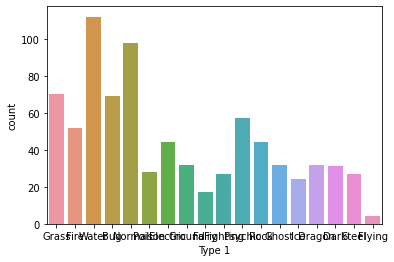

In [11]:
sns.countplot(df['Type 1'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Type 2', ylabel='count'>

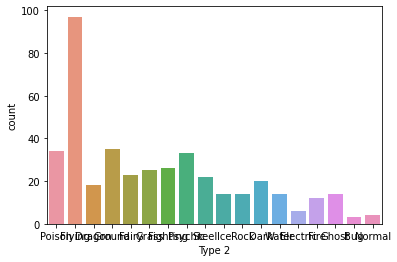

In [12]:
sns.countplot(df['Type 2'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Generation', ylabel='count'>

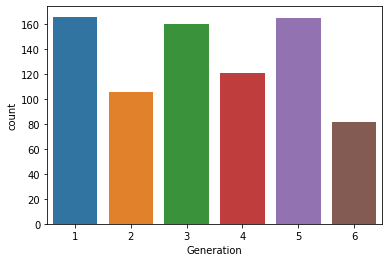

In [39]:
sns.countplot(df.Generation)

## Applying K-means

In [13]:
kmeans=KMeans(n_clusters=3)

In [14]:
# Treinando o modelo e retirando a coluna com o nome e tipo do Pokemon
kmeans.fit(df.drop(['Name','#','Type 1', 'Type 2','Legendary','Total','Generation'],axis=1))

KMeans(n_clusters=3)

In [15]:
# Quais são as posições dos centróides?
kmeans.cluster_centers_


array([[ 54.69577465,  57.16338028,  53.43943662,  52.06478873,
         52.87042254,  53.87323944],
       [ 79.09195402,  96.06321839, 109.45977011,  66.93678161,
         87.50574713,  56.59195402],
       [ 82.02214022,  96.65313653,  77.70110701, 103.78597786,
         86.81549815,  94.64944649]])

In [16]:

# Quais foram as classes criadas?
kmeans.labels_

array([0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 0, 1, 1,
       0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2,
       0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 2,
       2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1,
       0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 2, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       2, 0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,

In [17]:
df['cluster_'] = kmeans.labels_

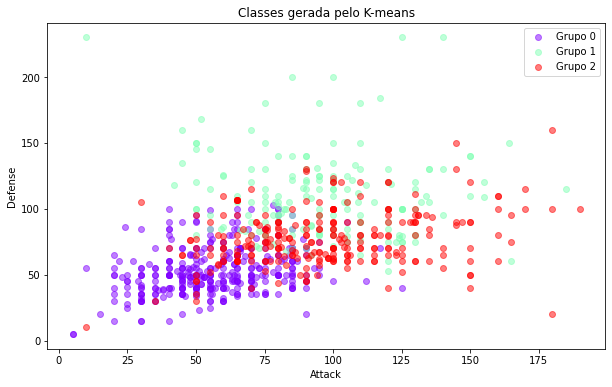

In [52]:
def plot_clusters(kmeans,coluna_cluster):
    n_clusters = max(kmeans.labels_)+1
    colors = cm.rainbow(np.linspace(0, 1, n_clusters))
    cluster_labels = list(range(0, n_clusters))
    # Cria uma figura de tamanho 6x4 polegadas
    plt.figure(figsize=(10,6))
    for color, label in zip(colors, cluster_labels):
        subset = df[df[coluna_cluster] == label]
    #     for i in subset.index:
    #             plt.text(subset['Attack'][i], subset['Defense'][i],str(subset['Name'][i]), rotation=25) 
        plt.scatter(subset['Attack'], subset['Defense'], c=color, label='Grupo '+str(label),alpha=0.5)
    #    plt.scatter(subset.horsepow, subset.mpg)
    plt.legend()
    plt.title('Classes gerada pelo K-means')
    plt.xlabel('Attack')
    plt.ylabel('Defense')
plot_clusters(kmeans,'cluster_')

This visualization is not so good to see the dif

## Plotting 3D graph to see clusters

In [19]:
import plotly.express as px

fig = px.scatter_3d(df, x='Attack', y='Defense', z='Speed',
              color='cluster_')

fig.show()


## Silhouette coefficient 

A silhouette coefficient, or a silhouette score is a metric used to evaluate the quality of clusters created by the algorithm.

Silhouette scores range from -1 to +1. The higher the silhouette score, the better the model.

The silhouette score measures the distance between all the data points within the same cluster. The lower this distance, the better the silhouette score.

It also measures the distance between an object and the data points in the nearest cluster. The higher this distance, the better.

A silhouette score closer to +1 indicates good clustering performance, and a silhouette score closer to -1 indicates a poor clustering model.
Ref: https://www.natasshaselvaraj.com/customer-segmentation-with-python/

In [44]:
print(silhouette_score(df.drop(['Name','#','Type 1', 'Type 2','Legendary','Total','Generation','cluster_'],axis=1), kmeans.labels_, metric='euclidean'))


0.26174183170952214


## But the number of clusters in k-means is right?

In [21]:
# Criamos um for que vai fazer uma série de testes com numeros diferentes da qtd de clusters, 
# e com isso ele irá calcular o valor da inertia, e vamos adicionando esse valor no vetor "Sum_of_squared_distances"
df_final = df.drop(['Name','#','Type 1', 'Type 2','Legendary','Generation'],axis=1)
Sum_of_squared_distances = []
K = range(2,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_final)
    Sum_of_squared_distances.append(km.inertia_)

O cotovelo está no 3 mesmo

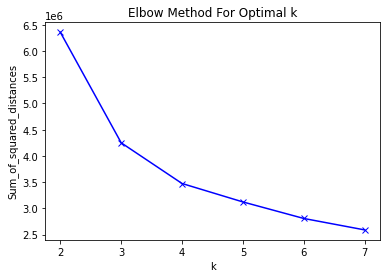

In [22]:

# Plotting Elbow Method
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Improve results with PCA

PCA is a technique that helps us reduce the dimension of a dataset. When we run PCA on a data frame, new components are created. These components explain the maximum variance in the model.

In [24]:
df_final = df.drop(['Name','#','Type 1', 'Type 2','Legendary'],axis=1)
df_final

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,cluster_
0,318,45,49,49,65,65,45,1,0
1,405,60,62,63,80,80,60,1,0
2,525,80,82,83,100,100,80,1,2
3,625,80,100,123,122,120,80,1,2
4,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6,1
796,700,50,160,110,160,110,110,6,2
797,600,80,110,60,150,130,70,6,2
798,680,80,160,60,170,130,80,6,2


In [27]:
from sklearn.preprocessing import StandardScaler

col_names= df_final.columns
scaler = StandardScaler().fit(df_final.values)
features = scaler.transform(df_final.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,cluster_
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-1.399637,-1.018972
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-1.399637,-1.018972
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,-1.399637,1.258060
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,-1.399637,1.258060
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-1.399637,-1.018972


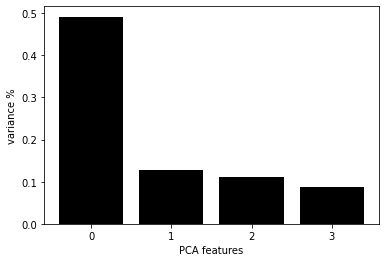

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(scaled_features)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)


Based on this visualization, we can see that the first PCA components explain around 50% of the dataset variance.

In [29]:
# Criamos um for que vai fazer uma série de testes com numeros diferentes da qtd de clusters, 
# e com isso ele irá calcular o valor da inertia, e vamos adicionando esse valor no vetor "Sum_of_squared_distances"
Sum_of_squared_distances = []
K = range(2,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(PCA_components.iloc[:,:2])
    Sum_of_squared_distances.append(km.inertia_)

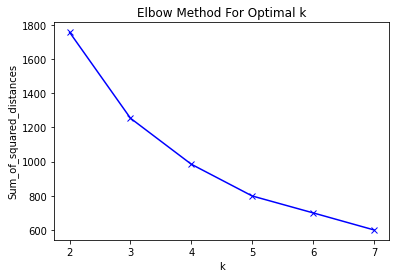

In [30]:

# Plotting Elbow Method
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

manteve no 3 mesmo

In [46]:
kmeans2 = KMeans(n_clusters=3)
clusters= kmeans2.fit_predict(PCA_components.iloc[:,:1])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:1], kmeans2.labels_, metric='euclidean'))

0.6235022724699085


Com a utilização do PCA teve uma melhora no desempenho do K-means

In [49]:
df["cluster_2"] = clusters


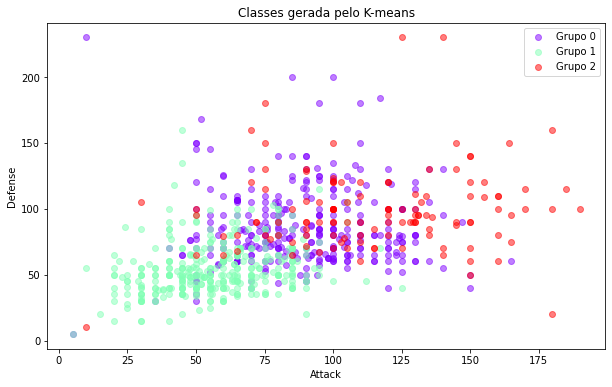

In [51]:

plot_clusters(kmeans2,'cluster_2')

In [34]:
fig = px.scatter_3d(df, x='Attack', y='Defense', z='Speed',
              color='cluster_2')

fig.show()


### Understanding pokemons profiles in clusters

In [35]:
avg_df = df.groupby(['cluster_2'], as_index=False).mean()
avg_df

,cluster_2,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,cluster_
0,0,370.509434,486.613208,78.345912,88.996855,85.591195,79.141509,81.261006,73.27673,3.377358,0.003145,1.512579
1,1,342.407303,323.589888,53.629213,57.289326,54.547753,51.727528,52.758427,53.63764,3.264045,0.000000,0.014045
2,2,401.047619,620.166667,90.484127,115.119048,98.706349,116.460317,102.373016,97.02381,3.357143,0.507937,1.825397


In [36]:
avg_df.mean()

cluster_2       1.000000
#             371.321452
Total         476.789921
HP             74.153084
Attack         87.135076
Defense        79.615099
Sp. Atk        82.443118
Sp. Def        78.797483
Speed          74.646060
Generation      3.332849
Legendary       0.170360
cluster_        1.117340
dtype: float64

<AxesSubplot:xlabel='cluster_2', ylabel='HP'>

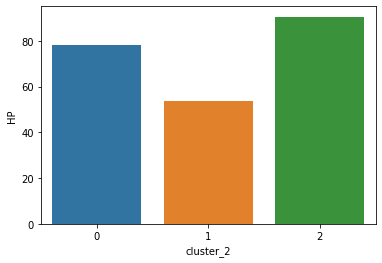

In [37]:
sns.barplot(x='cluster_2',y='HP',data=avg_df)


<AxesSubplot:xlabel='cluster_2', ylabel='Attack'>

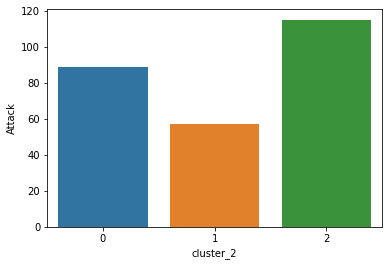

In [38]:
sns.barplot(x='cluster_2',y='Attack',data=avg_df)


<AxesSubplot:xlabel='cluster_2', ylabel='Defense'>

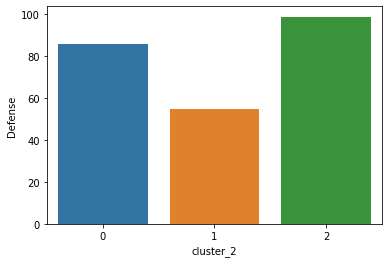

In [39]:
sns.barplot(x='cluster_2',y='Defense',data=avg_df)


<AxesSubplot:xlabel='cluster_2', ylabel='Sp. Atk'>

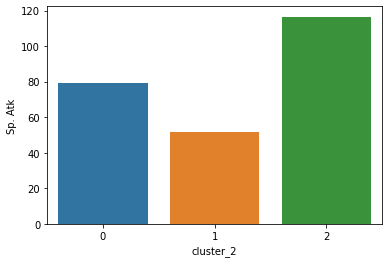

In [40]:
sns.barplot(x='cluster_2',y='Sp. Atk',data=avg_df)


<AxesSubplot:xlabel='cluster_2', ylabel='Sp. Def'>

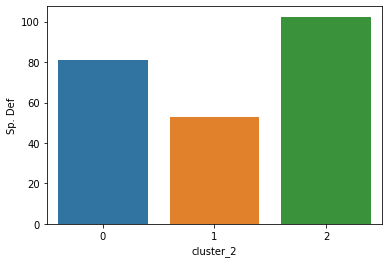

In [41]:
sns.barplot(x='cluster_2',y='Sp. Def',data=avg_df)


<AxesSubplot:xlabel='cluster_2', ylabel='Speed'>

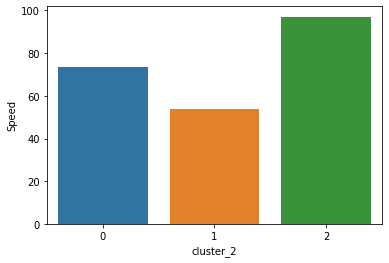

In [42]:
sns.barplot(x='cluster_2',y='Speed',data=avg_df)


## Main attributes of each segment


Cluster 0:
    
    1. Score médio de vida alto comparado a média. Ataque proximo da média, defesa acima da média, ataque especial abaixo da média, defesa especial acima da média, velocidade próximo da média (pokemon poderoso na defesa)

cluster 1:
    
    1. Score médio de vida abaixo da média, ataque, defesa, ataque e defesa especial e velocidade abaixo da média. 


Cluster 2:
    
    1. Score médio de vida acima da média, assim como ataque, defesa, ataque e defesa especial e velociada

## Building personas around each cluster


In [ ]:
Cluster 1: Superpowerful 
    
This pokemon is the most powerful 